# Diabetes Deep Learning

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adeniranstephen/obesity-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 32.7k/32.7k [00:00<00:00, 15.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adeniranstephen/obesity-prediction-dataset/versions/1


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(path + '/ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

import os

import numpy as np
import tensorflow as tf

import shutil

# model.save('/content/my_model/my_model.keras')

try:
  shutil.rmtree('my_model')
except Exception as e:
  print('shutil did not find such directory')

os.mkdir('/content/my_model')



del os

shutil did not find such directory


In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns
onehot_cols_X = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
ordinal_encoder_cols_X = ['CAEC', 'CALC']

categories_X = [['no', 'Sometimes', 'Frequently', 'Always'],
              ['no', 'Sometimes', 'Frequently', 'Always']]

categories_y = [['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II',\
                 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']]


ct_X = ColumnTransformer([
    ('scale', StandardScaler(), num_cols),
    ('onehot', OneHotEncoder(), onehot_cols_X),
    ('trying', OrdinalEncoder(categories=categories_X), ordinal_encoder_cols_X)
])

ct_y = ColumnTransformer([
    ('trying_again', OrdinalEncoder(categories=categories_y), ['NObeyesdad'])
])


X = df.drop('NObeyesdad', axis=1)
y = df[['NObeyesdad']]
y_transformed = ct_y.fit_transform(y)

X_train, X_test, y_train_transformed, y_test_transformed = train_test_split(X, y_transformed, test_size=0.2, random_state=42, stratify=y_transformed)
X_val, X_test, y_val_transformed, y_test_transformed = train_test_split(X_test, y_test_transformed, test_size=0.5, random_state=42, stratify=y_test_transformed)


X_train_transformed = ct_X.fit_transform(X_train)
X_test_transformed = ct_X.transform(X_test)
X_val_transformed = ct_X.transform(X_val)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train_transformed.shape[1:]),
    tf.keras.layers.Dense(units=64, activation='linear', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(units=64, activation='linear', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(units=64, activation='linear', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(units=64, activation='linear', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(7, activation='linear', kernel_initializer='glorot_uniform')
])

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/my_model/my_model.keras',
    monitor='val_loss',
    save_best_only=True,
)

# early_stopping_callback = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )

plateau_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
    min_delta=0.0001,
    min_lr=0.0,
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]

)

history = model.fit(X_train_transformed, y_train_transformed,
          validation_data=(X_val_transformed, y_val_transformed),
          epochs=100,
          callbacks=[checkpoint_callback, plateau_callback]
          )




Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 1.5904 - sparse_categorical_accuracy: 0.4169 - val_loss: 71.6333 - val_sparse_categorical_accuracy: 0.3934 - learning_rate: 0.1000
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6646 - sparse_categorical_accuracy: 0.7175 - val_loss: 17.1703 - val_sparse_categorical_accuracy: 0.4360 - learning_rate: 0.1000
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7481 - sparse_categorical_accuracy: 0.6986 - val_loss: 7.1611 - val_sparse_categorical_accuracy: 0.5071 - learning_rate: 0.1000
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4740 - sparse_categorical_accuracy: 0.8238 - val_loss: 3.8101 - val_sparse_categorical_accuracy: 0.5545 - learning_rate: 0.1000
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5435 - sparse_categorical_accuracy: 0.7919 - val_loss: 9.4848 - val_sparse_categorical_accuracy: 0.5355 - learning_rate: 0.1000
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/ste

In [ ]:
model.evaluate(X_test_transformed, y_test_transformed)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2150 - sparse_categorical_accuracy: 0.9258 


[0.1961057186126709, 0.9339622855186462]

In [ ]:
model.metrics_names

['loss', 'compile_metrics']

In [ ]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy', 'learning_rate'])

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 64)                  │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_26 (ReLU)                      │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_27 (ReLU)                      │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_28 (ReLU)                      │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_29 (ReLU)                      │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,847 (179.09 KB)

 Trainable params: 15,111 (59.03 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 30,224 (118.07 KB)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy', 'learning_rate'])

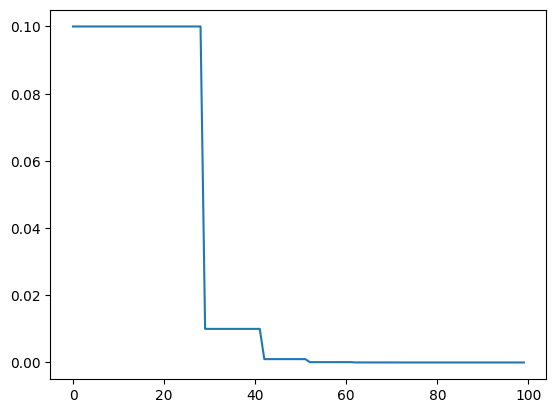

In [ ]:
plt.plot(history.history['learning_rate'])

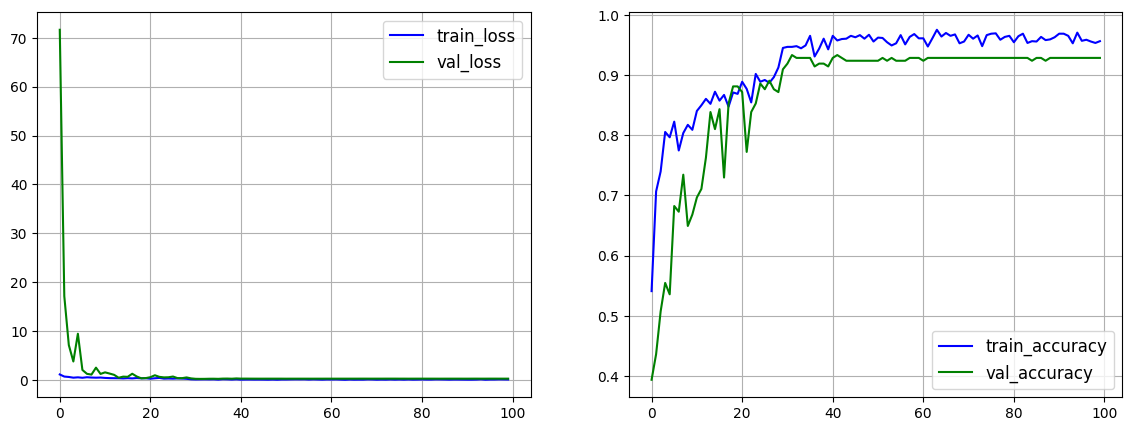

In [ ]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax1.plot(history.history['loss'], c='b', label='train_loss')
ax1.plot(history.history['val_loss'], c='g', label='val_loss')
ax1.legend(fontsize='large')
ax1.grid()


ax2.plot(history.history['sparse_categorical_accuracy'], c='b', label='train_accuracy')
ax2.plot(history.history['val_sparse_categorical_accuracy'], c='g', label='val_accuracy')
ax2.legend(fontsize='large')
ax2.grid()
plt.show()





## Visualizing

In [ ]:
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [ ]:
df['Gender'].unique().tolist()

['Female', 'Male']

In [ ]:
df.Gender.value_counts()

,count
Gender,
Male,1068
Female,1043


<Axes: xlabel='Gender'>

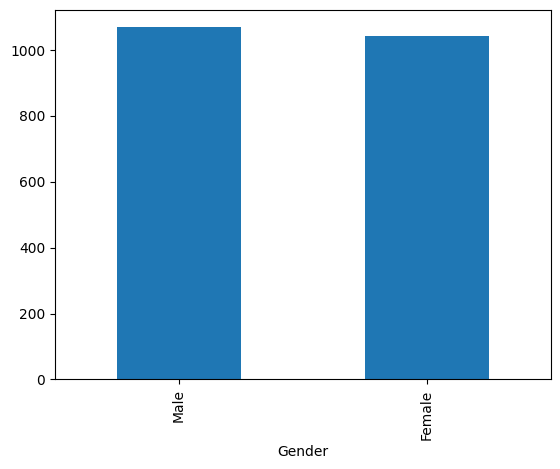

In [ ]:
df['Gender'].value_counts().plot.bar()

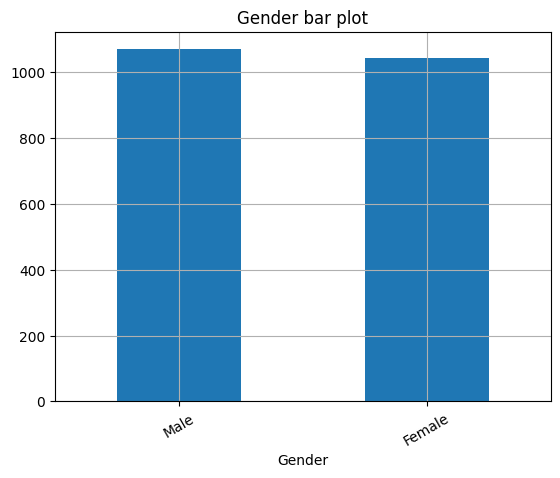

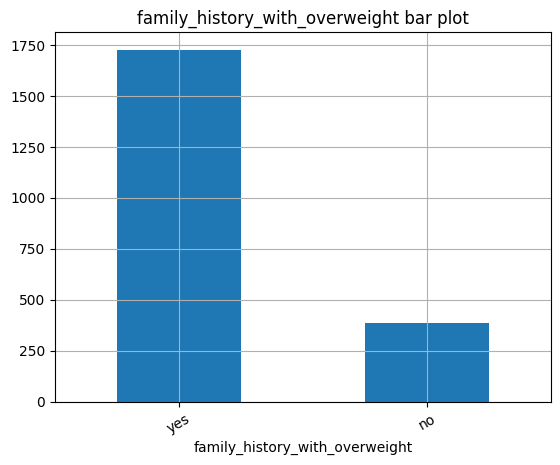

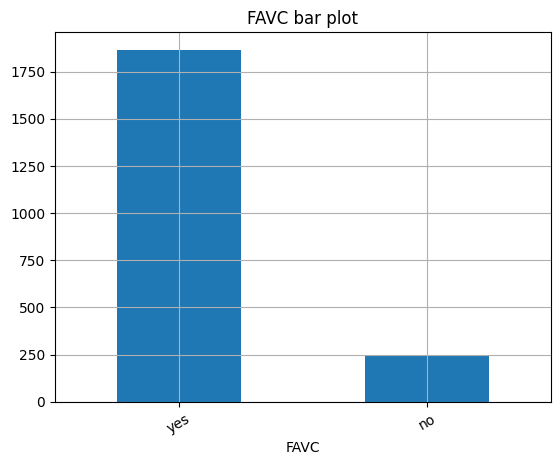

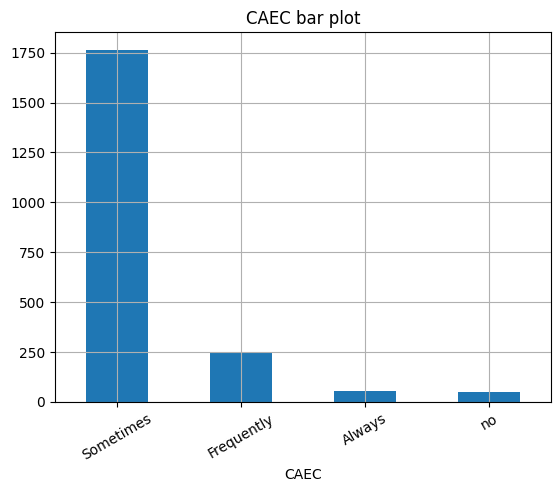

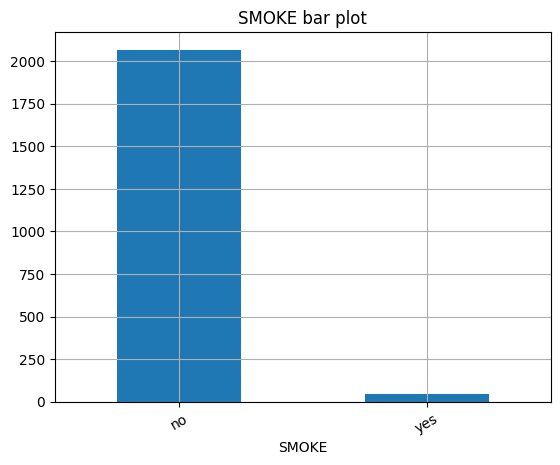

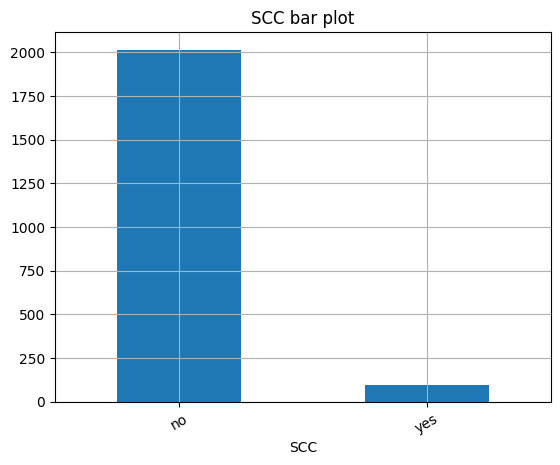

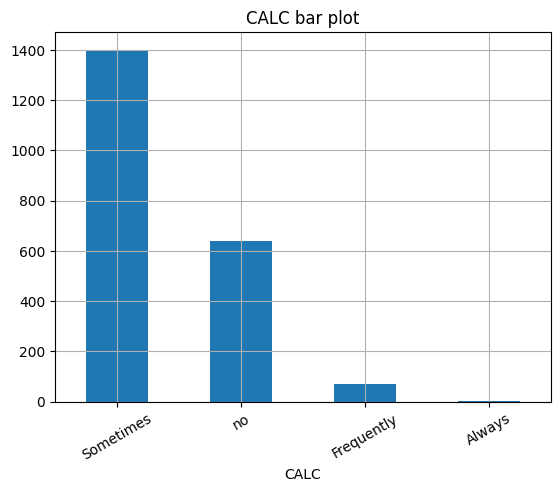

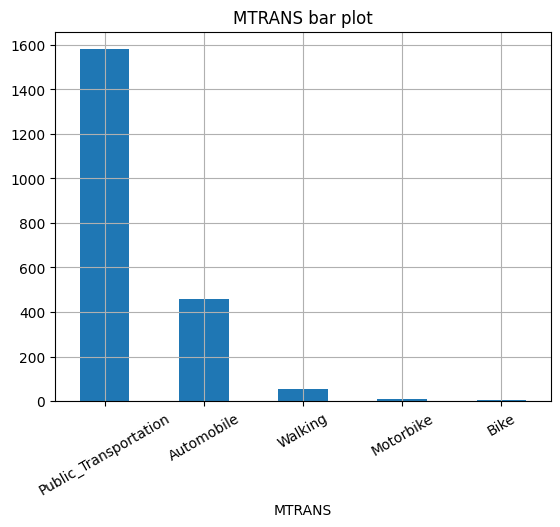

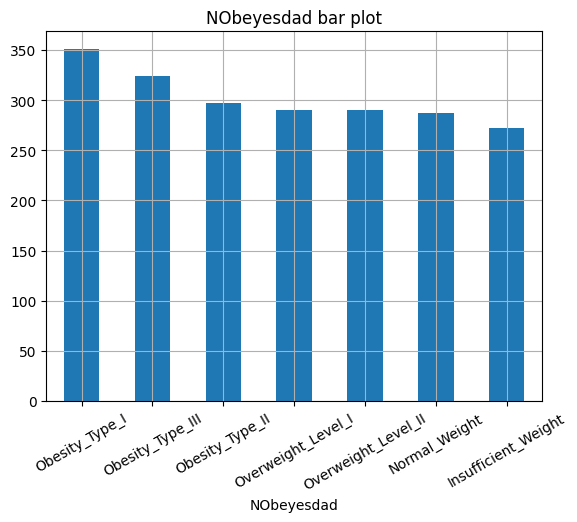

In [ ]:
for col in df.select_dtypes(include=object).columns:
  df[col].value_counts().plot.bar(title=f'{col} bar plot', grid=True,\
                   xlabel=f'{col}', rot=30)
  plt.show()

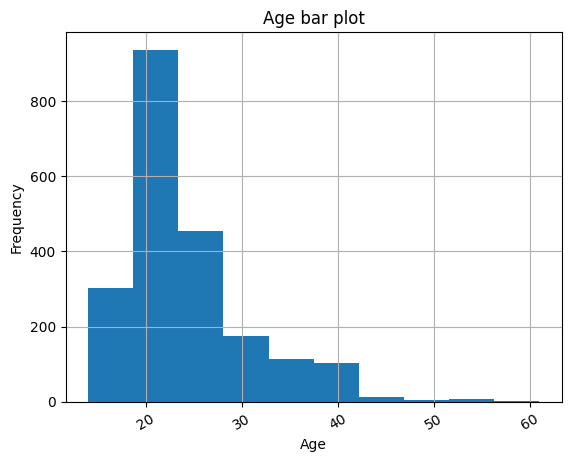

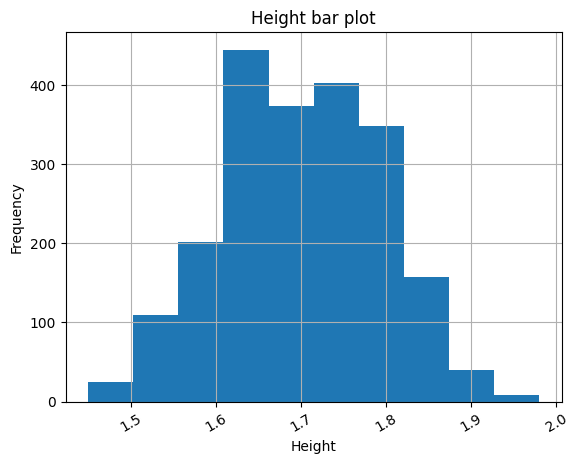

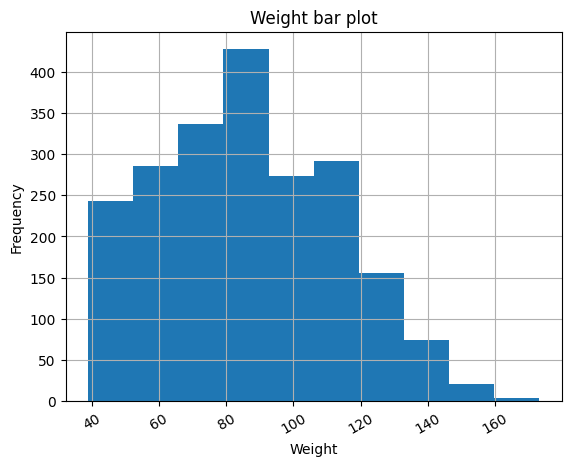

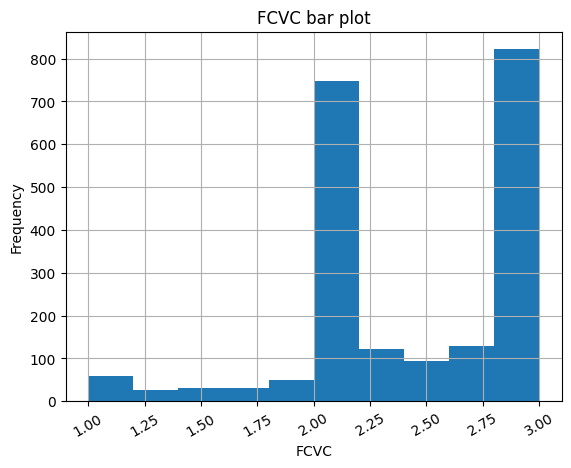

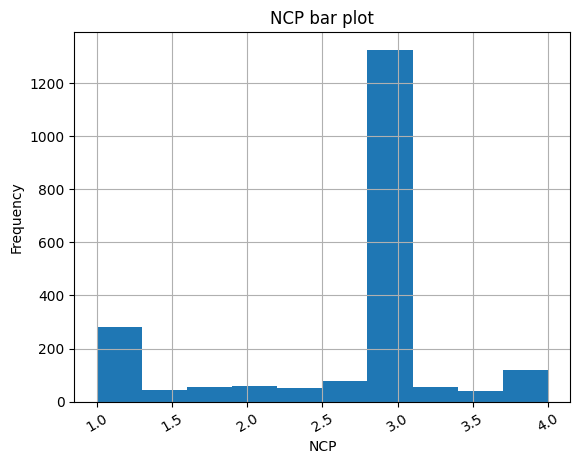

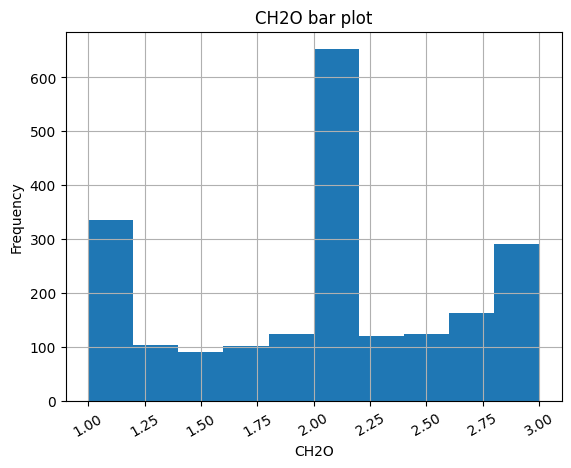

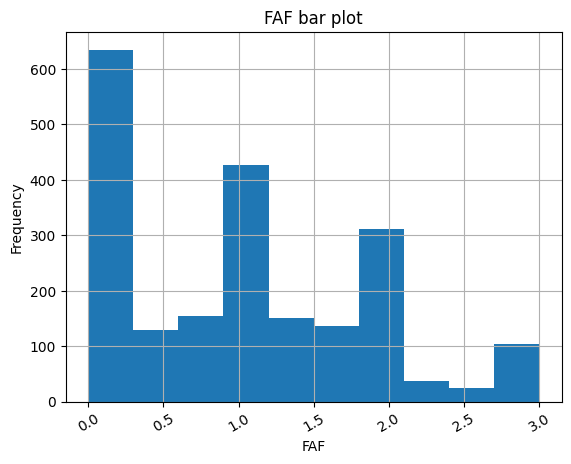

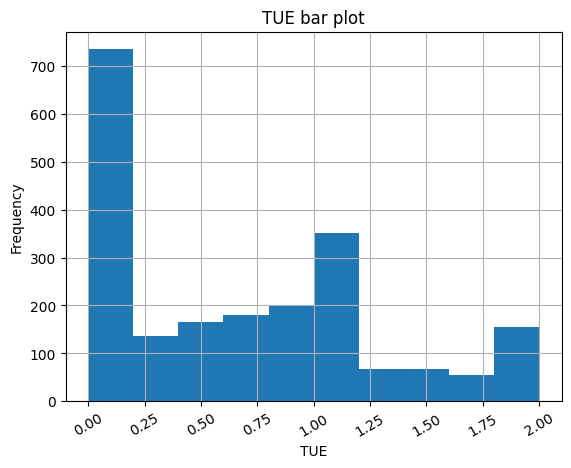

In [ ]:
for col in df.select_dtypes(exclude=object).columns:
  df[col].plot.hist(title=f'{col} bar plot', grid=True,\
                   xlabel=f'{col}', rot=30)
  plt.show()